In [1]:
import numpy as np
import pandas as pd
import glob, os, re
from num2tex import num2tex

In [2]:
from pylab import *
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'latex-sans',
 'light',
 'muted',
 'nature',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'sans',
 'scatter',
 'science',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'vibrant']

In [4]:
#plt.style.use(['science', 'bright', 'seaborn-paper'] )
#plt.style.use(['science','notebook', 'seaborn-talk', 'bright', 'latex-sans'] )

plt.style.use(['science', 'bright'] )

#plt.style.use(['science','bright','seaborn-talk'])
#%matplotlib inline
#inline
#sns.set_theme('paper')

## Figure: MSD for diff. $t_{re}$

In [5]:
%qtconsole

## Figure: Q_drop for diff. $t_{re}$

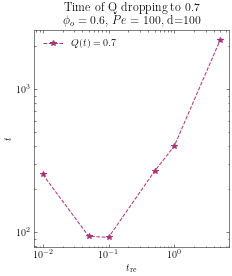

In [59]:
save = True
#save = False
phi = '0.6'
Q_d = 100
drop_thr = 0.7
Pe = '1e2'
fig = figure(figsize=(3.5,4))
t_lim = 9.9861e3
xscale('log')
yscale('log')
xlabel('$t$')
ylabel('$Q$')
#ylim(-0.05, 1.05)
#xlim(0.15, 1.e4)
flist = ['msds-direct/Q-phi0.6-Pe1e2-t_re1e-2.tsv',
         'msds-direct/Q-phi0.6-Pe1e2-t_re5e-2.tsv',
         'msds-direct/Q-phi0.6-Pe1e2-t_re1e-1.tsv',
         'msds-direct/Q-phi0.6-Pe1e2-t_re5e-1.tsv',         
         'msds-direct/Q-phi0.6-Pe1e2-t_re1.tsv',
         'msds-direct/Q-phi0.6-Pe1e2-t_re5.tsv',
        ]
re_pattern = '(?<=t_re).*(?=.tsv)'
drop_data = [[]]
for f0 in flist:
    df0 = pd.read_csv(f0, delim_whitespace=True, index_col=0)
    t_re = re.findall(re_pattern, f0)[0]
    Q = df0['%s'%str(Q_d)]
    t_drop = Q.sub(drop_thr).abs().idxmin()
    drop_data = drop_data + [[float(t_re), t_drop]]   
    #plot(df0.loc[1e-2:t_lim].index, df0.loc[1e-2:t_lim]['%d'%Q_d], label=label)
#legend(loc='best')
drop_data = np.array(drop_data[1:])
plot(drop_data[:, 0], drop_data[:, 1], '--*', color='C5', label='$Q(t) = %s$'%'{:.1g}'.format(num2tex(drop_thr)))
xscale('log')
yscale('log')
xlabel('$t_{\mathrm{re}}$')
#ylabel('$t^{Q}_{\mathrm{drop}}$')
ylabel('$t$')
legend(loc='best')
title('Time of Q dropping to {:g}\n'.format(drop_thr)+r'$\phi_o={}$, $Pe={:g}$, d={:g}'.format(phi, num2tex(float(Pe)), Q_d))

#title(r'Pe={Pe}'.format(Pe=Pe) + ', $\phi_o=%s$'%phi + ', $d = %d$'%Q_d)
if save:
    fname = 'plots/Qtd{Q_d}-t_drop-drop_thr{drop_thr}-Na100-No500-phi{phi}-Pe{Pe}-diff-t_re'.format(phi=phi, Pe=Pe, Q_d=Q_d, drop_thr=drop_thr)
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

In [9]:
drop_data

array([[1.0000e-02, 7.5200e+02],
       [5.0000e-02, 2.6840e+02],
       [1.0000e-01, 2.4840e+02],
       [5.0000e-01, 1.0694e+03],
       [1.0000e+00, 1.0646e+03],
       [5.0000e+00, 5.0484e+03]])

In [81]:
df0.loc[1e-2:t_lim].index

Float64Index([   0.2,    0.4,    0.6,    0.8,    1.0,    1.2,    1.4,    1.6,
                 1.8,    2.0,
              ...
              9984.2, 9984.4, 9984.6, 9984.8, 9985.0, 9985.2, 9985.4, 9985.6,
              9985.8, 9986.0],
             dtype='float64', name='time', length=49930)

## Figure: Probability density function of the localisation lengths

In [ ]:
l = 0.01
lw=1
plot(b, 1.5*l*np.exp(-l*b), '--', color='C3', lw=lw)
b0 = np.linspace(50,360,1000)


In [143]:
#%matplotlib
%qtconsole

In [ ]:
f = figure()
xscale('log')
yscale('log')
for c in df1.columns[::3]:
    plot(df1.index/t0, df1[c])

In [175]:
from scipy.stats import gamma


In [176]:
#ids = df1.iloc[-100:-50].mean(axis=0).sub(2e4)<0


In [177]:
l = 0.009
lw = 2
y, b, _ = hist(pool[pool<360], bins=50, density=True, color='C1')
plot(b, 1.5*l*np.exp(-l*b), '--', color='C3', lw=lw)
b0 = np.linspace(50,360,1000)
a = 3.5  # k = 1
l1 = 0.02
mean, var, skew, kurt = gamma.stats(a, scale=1./l1, moments='mvsk')
y1 = gamma.pdf(b0, a, scale=1./l1)
plot(b0, y1)
xlabel('Localization length')
ylabel('Probability density function')

NameError: name 'pool' is not defined

In [296]:
for i in range(10):
    n = np.count_nonzero(~np.isnan(df.values[:,i]))
    plot(i, n, 'o')

In [13]:
#%matplotlib inline
%qtconsole

In [29]:
%qtconsole

In [80]:
ax3.get_xticklabels()

[Text(1e-05, 0, ''),
 Text(0.001, 0, ''),
 Text(0.1, 0, ''),
 Text(10.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(100000.0, 0, '')]

In [94]:
def get_df_dicts_phi():
    t_re = "1e-2"
    TM = 'random'
    flist_s = glob.glob('gwdg/msds/msd*phi*t_re1e-2*tgsd2e-1*sigmoid*BG0.2*TM{TM}*allsims.tsv'.format(TM=TM))
    flist_u = glob.glob('gwdg/msds/msd*phi*t_re1e-2*tgsd2e-1*uniform*BG0.2*TM{TM}*allsims.tsv'.format(TM=TM))

    re_pattern = '(?<=phi).*(?=-T1e-2)'
    flist_s.sort(key=lambda x: float(re.findall(re_pattern, x)[0]))
    flist_u.sort(key=lambda x: float(re.findall(re_pattern, x)[0]))
    df_s = {}
    df_u = {}
    for f0 in flist_s:
        phi = re.findall(re_pattern, f0)[0]
        df_s[phi] = pd.read_csv(f0, delim_whitespace=True, index_col=0).iloc[1:]
    for f0 in flist_u:
        phi = re.findall(re_pattern, f0)[0]
        df_u[phi] = pd.read_csv(f0, delim_whitespace=True, index_col=0).iloc[1:]
    return df_s, df_u

## Figure: Q for diff. $t_{re}$

FileNotFoundError: [Errno 2] No such file or directory: 'gwdg/Qs/Qtd-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd2e-1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.5-TMrandom.tsv'

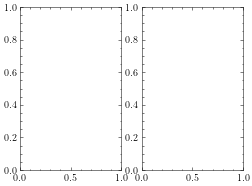

In [859]:
save = True
save = False
do_inset = True
t_re0=5e-3
Pe = 100
phi = '0.4'
Q_d1 = 100
Q_d2 = 200
fig = figure(constrained_layout=False, figsize=(4,3))
ax_dict = fig.subplot_mosaic('AB')

flist = ['gwdg/Qs/Qtd-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.5-TMrandom.tsv',
         'gwdg/Qs/Qtd-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         #'gwdg/Qs/Qtd-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.05-TMrandom.tsv',
         #'gwdg/Qs/Qtd-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.01-TMrandom.tsv',
         'gwdg/Qs/Qtd-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.005-TMrandom.tsv',
         'gwdg/Qs/Qtd-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.001-TMrandom.tsv',
        ]
re_pattern = '(?<=BG).*(?=-TMrandom)'
for f0 in flist:
    f0 = f0.replace('tgsd1e-2', 'tgsd2e-1')
    df0 = pd.read_csv(f0, delim_whitespace=True, index_col=0)
    BG = re.findall(re_pattern, f0)[0]
    t_re = t_re0/float(BG)
    label = r'$t_{\mathrm{re}}=%s$'%'{:.1e}'.format(num2tex(float(t_re)))
    ax_dict['A'].plot(df0.index, df0['%d'%Q_d1], label=label)#, color='C%d'%i)
    ax_dict['B'].plot(df0.index, df0['%d'%Q_d2], label=label)#, color='C%d'%i)
for ax in ax_dict.values():
    ax.set_xscale('log')
    ax.set_xlabel('$t$')
    #ax.set_xlim(1e-2, 1e4)
    
ax_dict['A'].set_ylabel('$Q(t, d)$')
#ax_dict['B'].set_ylabel('$Q(t, d=200)$')
#ax_dict['B'].set_xlim(1e-2, 1e4)
ax_dict['B'].set_yticklabels([])
if do_inset:
    ax3 = fig.add_axes([0.3, 0.72, 0.2, 0.2])
    #ax3.yaxis.set_ticks_position('right')
    #ax3.yaxis.set_label_position('right')

    #ax3.xaxis.set_ticks_position('top')
    #ax3.xaxis.set_label_position('top')

    ax3.plot(drop_data[:, 0], drop_data[:, 1], '-.x', color='C5', label='$d={}$'.format(Q_d))
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.set_xlabel('$t_{\mathrm{re}}$')
    ax3.set_ylabel('$\\tau_Q$')
ax_dict['A'].legend(loc='lower left', frameon=True, fontsize=7)

plt.tight_layout()
if save:
    fname1 = 'plots/4paper/Qtd{Q_d1}d{Q_d2}-Na100-No500-phi{phi}-Pe{Pe}-diff-t_re'.format(phi=phi, Pe=Pe, Q_d1=Q_d1, Q_d2=Q_d2)
    fname1 = fname1.replace('.', '_')
    fname2 = fname1.replace('4paper/', '')
    print(fname1)
    fig.savefig(fname1+'.pdf', dpi=200, bbox_inches='tight')
    fig.savefig(fname2+'.svg', dpi=200, bbox_inches='tight')

plots/4paper/Qtd100-v4-Na100-No2500-phi0_4-diff-t_re-Gsigmoid


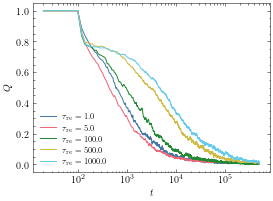

In [874]:
save = True
#save = False
do_inset = True
do_inset = False
t_re0=5e-1
Pe = 100
phi = '0.4'
Q_d1 = 100
Q_d2 = 100
Q_d = 100
G = 'uniform'
G = 'sigmoid'
loc_legend = {'sigmoid': 'lower left', 'uniform': 'lower left'}
inset_coords = {
    'sigmoid': [0.63, 0.62, 0.3, 0.28],
    'uniform': [0.63, 0.62, 0.3, 0.28],
    #'uniform': [0.2, 0.2, 0.3, 0.28]
}
fig = figure(constrained_layout=False, figsize=(4,3))
ax_dict = fig.subplot_mosaic('A')
Q_fname = 'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi{phi}-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG{BG}-TMrandom.tsv'
flist = [Q_fname.format(phi=phi, BG=BG, G=G) for BG in ['0.5', '0.1', '0.05', '0.01', '0.005', '0.001', '0.0005']]
BG_list = ['0.5', '0.1', '0.005', '0.001', '0.0005']
re_pattern = '(?<=BG).*(?=-TMrandom)'
drop_data = [[]]
for f0 in flist:
    f0 = f0.replace('tgsd1e-2', 'tgsd2e-1')
    df0 = pd.read_csv(f0, delim_whitespace=True, index_col=0)
    BG = re.findall(re_pattern, f0)[0]
    t_re = t_re0/float(BG)
    label = r'$\tau_{\mathrm{re}}=%s$'%'{:.1f}'.format(num2tex(float(t_re)))
    Q = df0['%s'%str(Q_d)]
    
    #ax_dict['B'].plot(df0.index, df0['%d'%Q_d2], label=label)#, color='C%d'%i)

    t_drop = Q.sub(drop_thr).abs().idxmin()
    drop_data = drop_data + [[float(t_re), t_drop]]   
    if BG in BG_list:
        ax_dict['A'].plot(Q.loc[2e-1:].index, Q.loc[2e-1:], label=label)#, color='C%d'%i)
drop_data = np.array(drop_data[1:])
for ax in ax_dict.values():
    ax.set_xscale('log')
    ax.set_xlabel('$t$')
    #ax.set_xlim(1e-2, 1e4)
    
ax_dict['A'].set_ylabel('$Q$')
#ax_dict['B'].set_ylabel('$Q(t, d=200)$')
#ax_dict['A'].set_xlim(None, 1e7)
#ax_dict['B'].set_yticklabels([])


if do_inset:
    ax3 = fig.add_axes(inset_coords[G])
    #ax3.yaxis.set_ticks_position('right')
    #ax3.yaxis.set_label_position('right')

    #ax3.xaxis.set_ticks_position('top')
    #ax3.xaxis.set_label_position('top')

    ax3.plot(drop_data[:, 0], drop_data[:, 1], '-x', color='C5', label='$d={}$'.format(Q_d))
    ax3.set_xscale('log')
    #ax3.set_yscale('log')
    ax3.set_xlabel('$\\tau_{\mathrm{re}}$')
    ax3.set_ylabel('$\\tau_Q$')

ax_dict['A'].legend(loc=loc_legend[G], frameon=False, fontsize=8)

plt.tight_layout()
if save:
    fname1 = 'plots/4paper/Qtd{Q_d1}-v4-Na100-No2500-phi{phi}-diff-t_re-G{G}'.format(phi=phi, Q_d1=Q_d1, G=G)
    fname1 = fname1.replace('.', '_')
    fname2 = fname1.replace('4paper/', '')
    print(fname1)
    fig.savefig(fname1+'.pdf', dpi=200, bbox_inches='tight')
    fig.savefig(fname2+'.svg', dpi=200, bbox_inches='tight')

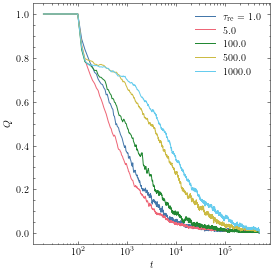

In [12]:
save = True
#save = False
do_inset = True
do_inset = False
t_re0=5e-1
Pe = 100
drop_thr = 0.6
phi = '0.4'
Q_d1 = 100
Q_d2 = 100
Q_d = 100
G = 'uniform'
G = 'sigmoid'
loc_legend = {'sigmoid': 'lower left', 'uniform': 'lower left'}
inset_coords = {
    'sigmoid': [0.63, 0.62, 0.3, 0.28],
    'uniform': [0.63, 0.62, 0.3, 0.28],
    #'uniform': [0.2, 0.2, 0.3, 0.28]
}
fig = figure(constrained_layout=False, figsize=(4, 4))
ax_dict = fig.subplot_mosaic('A')
Q_fname = 'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi{phi}-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG{BG}-TMrandom.tsv'
flist = [Q_fname.format(phi=phi, BG=BG, G=G) for BG in ['0.5', '0.1', '0.05', '0.01', '0.005', '0.001', '0.0005']]
BG_list = ['0.5', '0.1', '0.005', '0.001', '0.0005']
re_pattern = '(?<=BG).*(?=-TMrandom)'
drop_data = [[]]
for f0 in flist:
    f0 = f0.replace('tgsd1e-2', 'tgsd2e-1')
    df0 = pd.read_csv(f0, delim_whitespace=True, index_col=0)
    BG = re.findall(re_pattern, f0)[0]
    t_re = t_re0/float(BG)
    if f0==flist[0]:
        label = r'$\tau_{\mathrm{re}}=%s$'%'{:.1f}'.format(num2tex(float(t_re)))
    else:
        label = r'$%s$'%'{:.1f}'.format(num2tex(float(t_re)))
    Q = df0['%s'%str(Q_d)]
    
    #ax_dict['B'].plot(df0.index, df0['%d'%Q_d2], label=label)#, color='C%d'%i)

    t_drop = Q.sub(drop_thr).abs().idxmin()
    drop_data = drop_data + [[float(t_re), t_drop]]   
    if BG in BG_list:
        ax_dict['A'].plot(Q.loc[2e-1:].index, Q.loc[2e-1:], label=label)#, color='C%d'%i)
drop_data = np.array(drop_data[1:])
for ax in ax_dict.values():
    ax.set_xscale('log')
    ax.set_xlabel('$t$')
    #ax.set_xlim(1e-2, 1e4)
    
ax_dict['A'].set_ylabel('$Q$')
#ax_dict['B'].set_ylabel('$Q(t, d=200)$')
#ax_dict['A'].set_xlim(None, 1e7)
#ax_dict['B'].set_yticklabels([])


if do_inset:
    ax3 = fig.add_axes(inset_coords[G])
    #ax3.yaxis.set_ticks_position('right')
    #ax3.yaxis.set_label_position('right')

    #ax3.xaxis.set_ticks_position('top')
    #ax3.xaxis.set_label_position('top')

    ax3.plot(drop_data[:, 0], drop_data[:, 1], '-x', color='C5', label='$d={}$'.format(Q_d))
    ax3.set_xscale('log')
    #ax3.set_yscale('log')
    ax3.set_xlabel('$\\tau_{\mathrm{re}}$')
    ax3.set_ylabel('$\\tau_Q$')

ax_dict['A'].legend(loc='best')#, frameon=False, fontsize=8)

plt.tight_layout()
if save:
    fname1 = 'plots/4slides//Qtd-tau_re-phi0.4'
    fig.savefig(fname1+'.svg', dpi=200, bbox_inches='tight')


## Q(t,d) vs $\phi$ for diff G

In [54]:
%qtconsole

In [63]:
phi_list = ['0.3', '0.4', '0.5', '0.6', '0.7']
phi_arrf = np.array(phi_list).astype(float)

ttrap_mean_s = np.array([[24.76649124],
       [29.72331362],
       [34.42328206],
       [40.30533507],
       [54.21328824]])
ttrap_mean_u = np.array([[ 42.42053572],
       [ 48.09771531],
       [ 56.81502533],
       [ 74.91306339],
       [117.78257202]])



/tmp/ipykernel_1253866/504001958.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


plots/4paper/fig6-v2


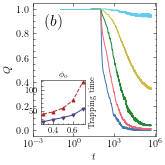

In [965]:
save = True
#save = False
do_inset = True
#do_inset = False
inset_fs = 8
C1 = 'darkslateblue'
C2 = 'firebrick'

G = 'sigmoid'
#G = 'uniform'
t_re0=5e-1
t1=1e-2
t2 = 4.99e5
drop_thr = 0.6
phi = '0.4'
Q_d = 100
Q_d = 100
fig = figure(constrained_layout=False, figsize=(2.5,2.5))
ax_dict = fig.subplot_mosaic('A')
#Q_fname = 'gwdg/Qs/Qtd-2D-Na100-No500-Ro5-phi{phi}-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG{BG}-TMrandom.tsv'
#flist = [Q_fname.format(phi=phi, BG=BG) for BG in ['0.5', '0.1', '0.005', '0.001']]
flist = ['gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.3-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.5-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.6-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.7-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
        ]
re_pattern_BG = '(?<=BG).*(?=-TMrandom)'
re_pattern_tre = '(?<=t_re).*(?=-tgsd)'
re_pattern_phi = '(?<=phi).*(?=-T0)'
drop_data_d = dict()
drop_data = [[]]
for i, f0 in enumerate(flist):
    df0 = pd.read_csv(f0.format(G=G), delim_whitespace=True, index_col=0)
    phi = re.findall(re_pattern_phi, f0)[0]
    BG = re.findall(re_pattern_BG, f0)[0]
    t_re0 = float(re.findall(re_pattern_tre, f0)[0])
    t_re = t_re0/float(BG)
    label = r'$\phi_o=%s$'%'{:.1g}'.format(num2tex(float(phi)))
    #ax_dict['A'].plot(df0.loc[t1:t2].index, df0.loc[t1:t2]['%d'%Q_d1], label=label)#, color='C%d'%i)
    t1 = 1e-2
    ax_dict['A'].plot([0.1, 2e1], [1, 1], color='C%d'%i)
    ax_dict['A'].plot(df0.loc[t1:t2].index, df0.loc[t1:t2]['%d'%Q_d], color='C%d'%i, label=label)#, color='C%d'%i)
    Q = df0['%s'%str(Q_d1)]
    t_drop = Q.sub(drop_thr).abs().idxmin()
    drop_data = drop_data + [[float(phi), t_drop]]   
drop_data = np.array(drop_data[1:])
drop_data[-1, 1] = np.inf 
for ax in ax_dict.values():
    ax.set_xscale('log')
    ax.set_xlabel('$t$')
    #ax.set_xlim(1, 1e6)
    
ax_dict['A'].set_ylabel('$Q$')
#ax_dict['B'].set_ylabel('$Q(t, d=200)$')
ax_dict['A'].set_xlim(1e-3, None)
#ax_dict['B'].set_yticklabels([])
if do_inset:
    ax3 = fig.add_axes([0.27, 0.27, 0.24, 0.24])
    ax3.yaxis.set_ticks_position('left')
    ax3.yaxis.set_label_position('right')
    ax3.tick_params(axis='x', labelsize=inset_fs)
    ax3.tick_params(axis='y', labelsize=inset_fs)

    ax3.xaxis.set_ticks_position('bottom')
    ax3.xaxis.set_label_position('top')

    #ax3.plot(drop_data[:, 0], drop_data[:, 1], '-.+', color='C5', label='$d={}$'.format(Q_d))
    #ax3.set_xscale('log')
    plot(phi_arrf, ttrap_mean_s, '-v', color=C1, label='S', ms=3)
    plot(phi_arrf, ttrap_mean_u, '--^', color=C2, label='U', ms=3)
    #ax3.set_yscale('log')
    ax3.set_xlabel('$\phi_{\mathrm{o}}$', fontsize=inset_fs)
    #ax3.set_xticks([0.3, 0.4, 0.5, 0.6, 0.7])
    ax3.set_ylabel('Trapping time', fontsize=inset_fs)
    
#ax_dict['A'].legend(loc='upper left', frameon=True, fontsize=8)
plt.text(  # position text relative to Axes
    .1, .92, '$(b)$', fontsize=16,
    ha='left', va='top',
    transform=ax.transAxes)

plt.tight_layout()
if save:
    #fname1 = 'plots/4paper/Qtd{Q_d1}-v4-Na100-No2500-diff-phi-t_re5-G{G}'.format(Q_d1=Q_d1, Q_d2=Q_d2, G=G)
    fname1 = 'plots/4paper/fig6-v2'
    fname1 = fname1.replace('.', '_')
    fname2 = fname1.replace('4paper/', '')
    print(fname1)
    fig.savefig(fname1+'.pdf', dpi=200, bbox_inches='tight')
    fig.savefig(fname2+'.svg', dpi=200, bbox_inches='tight')

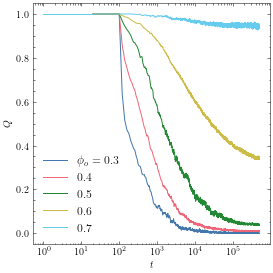

In [10]:
save = True
#save = False
do_inset = True
do_inset = False
inset_fs = 8
C1 = 'darkslateblue'
C2 = 'firebrick'

G = 'sigmoid'
#G = 'uniform'
t_re0=5e-1
t1=1e-2
t2 = 4.99e5
drop_thr = 0.6
phi = '0.4'
Q_d = 100
Q_d1 = 100
fig = figure(constrained_layout=False, figsize=(4, 4))
ax_dict = fig.subplot_mosaic('A')
#Q_fname = 'gwdg/Qs/Qtd-2D-Na100-No500-Ro5-phi{phi}-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG{BG}-TMrandom.tsv'
#flist = [Q_fname.format(phi=phi, BG=BG) for BG in ['0.5', '0.1', '0.005', '0.001']]
flist = ['gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.3-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.5-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.6-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.7-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
        ]
re_pattern_BG = '(?<=BG).*(?=-TMrandom)'
re_pattern_tre = '(?<=t_re).*(?=-tgsd)'
re_pattern_phi = '(?<=phi).*(?=-T0)'
drop_data_d = dict()
drop_data = [[]]
for i, f0 in enumerate(flist):
    df0 = pd.read_csv(f0.format(G=G), delim_whitespace=True, index_col=0)
    phi = re.findall(re_pattern_phi, f0)[0]
    BG = re.findall(re_pattern_BG, f0)[0]
    t_re0 = float(re.findall(re_pattern_tre, f0)[0])
    t_re = t_re0/float(BG)
    if phi=='0.3':
        label = r'$\phi_o=%s$'%'{:.1g}'.format(num2tex(float(phi)))
    else:
        label = r'%s'%phi
    #ax_dict['A'].plot(df0.loc[t1:t2].index, df0.loc[t1:t2]['%d'%Q_d1], label=label)#, color='C%d'%i)
    t1 = 1e-2
    ax_dict['A'].plot([1, 2e1], [1, 1], color='C%d'%i)
    ax_dict['A'].plot(df0.loc[t1:t2].index, df0.loc[t1:t2]['%d'%Q_d], color='C%d'%i, label=label)#, color='C%d'%i)
    Q = df0['%s'%str(Q_d1)]
    t_drop = Q.sub(drop_thr).abs().idxmin()
    drop_data = drop_data + [[float(phi), t_drop]]   
drop_data = np.array(drop_data[1:])
drop_data[-1, 1] = np.inf 
for ax in ax_dict.values():
    ax.set_xscale('log')
    ax.set_xlabel('$t$')
    #ax.set_xlim(1, 1e6)
    
ax_dict['A'].set_ylabel('$Q$')
#ax_dict['B'].set_ylabel('$Q(t, d=200)$')
#ax_dict['A'].set_xlim(1e-3, None)
#ax_dict['B'].set_yticklabels([])
if do_inset:
    ax3 = fig.add_axes([0.37, 0.37, 0.3, 0.3])
    ax3.yaxis.set_ticks_position('left')
    ax3.yaxis.set_label_position('right')
    ax3.tick_params(axis='x', labelsize=inset_fs)
    ax3.tick_params(axis='y', labelsize=inset_fs)

    ax3.xaxis.set_ticks_position('bottom')
    ax3.xaxis.set_label_position('top')

    #ax3.plot(drop_data[:, 0], drop_data[:, 1], '-.+', color='C5', label='$d={}$'.format(Q_d))
    #ax3.set_xscale('log')
    plot(phi_arrf, ttrap_mean_s, '-v', color=C1, label='S', ms=3)
    plot(phi_arrf, ttrap_mean_u, '--^', color=C2, label='U', ms=3)
    #ax3.set_yscale('log')
    ax3.set_xlabel('$\phi_{\mathrm{o}}$', fontsize=inset_fs)
    #ax3.set_xticks([0.3, 0.4, 0.5, 0.6, 0.7])
    ax3.set_ylabel('Trapping time', fontsize=inset_fs)
    
ax_dict['A'].legend(loc='lower left', fontsize=12)

plt.tight_layout()
if save:
    #fname1 = 'plots/4paper/Qtd{Q_d1}-v4-Na100-No2500-diff-phi-t_re5-G{G}'.format(Q_d1=Q_d1, Q_d2=Q_d2, G=G)
    fname1 = 'plots/4slides/Qtd-phi-tau_re5'
    fig.savefig(fname1+'.svg', dpi=200, bbox_inches='tight')
    

plots/4paper/fig56c-v2


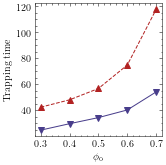

In [64]:
save = True
#save = False
do_inset = True
#do_inset = False
inset_fs = 8
C1 = 'darkslateblue'
C2 = 'firebrick'

G = 'sigmoid'
#G = 'uniform'
t_re0=5e-1
t1=1e-2
t2 = 4.99e5
drop_thr = 0.6
phi = '0.4'
Q_d = 100
Q_d = 100
fig = figure(constrained_layout=False, figsize=(2.5, 2.5))
ax_dict = fig.subplot_mosaic('A')
ax3 = ax_dict['A']
#ax3.yaxis.set_ticks_position('left')
#ax3.yaxis.set_label_position('right')
#ax3.tick_params(axis='x', labelsize=inset_fs)
#ax3.tick_params(axis='y', labelsize=inset_fs)

#ax3.xaxis.set_ticks_position('bottom')
#ax3.xaxis.set_label_position('top')

    #ax3.plot(drop_data[:, 0], drop_data[:, 1], '-.+', color='C5', label='$d={}$'.format(Q_d))
    #ax3.set_xscale('log')
plot(phi_arrf, ttrap_mean_s, '-v', color=C1, label='S')
plot(phi_arrf, ttrap_mean_u, '--^', color=C2, label='U')
#ax3.set_yscale('log')
ax3.set_xlabel('$\phi_{\mathrm{o}}$')#, fontsize=inset_fs)
ax3.set_xticks([0.3, 0.4, 0.5, 0.6, 0.7])
ax3.set_ylabel('Trapping time')#, fontsize=inset_fs)
    
#ax_dict['A'].legend(loc='upper left', frameon=True, fontsize=8)
#plt.text(  # position text relative to Axes
#    .1, .92, '$(c)$', fontsize=16,
#    ha='left', va='top',
#    transform=ax3.transAxes)

plt.tight_layout()
if save:
    #fname1 = 'plots/4paper/Qtd{Q_d1}-v4-Na100-No2500-diff-phi-t_re5-G{G}'.format(Q_d1=Q_d1, Q_d2=Q_d2, G=G)
    fname1 = 'plots/4paper/fig56c-v2'
    fname1 = fname1.replace('.', '_')
    fname2 = fname1.replace('4paper/', '')
    print(fname1)
    fig.savefig(fname1+'.pdf', dpi=200, bbox_inches='tight')
    fig.savefig(fname2+'.svg', dpi=200, bbox_inches='tight')

 # 2 subplots: diff G

plots/4paper/Qtd100-v4-Na100-No2500-diff-phi-t_re5-diffG


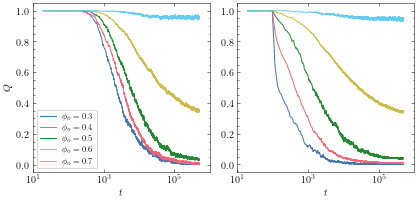

In [13]:
save = True
#save = False
do_inset = True
do_inset = False
G = 'sigmoid'
#G = 'uniform'
t_re0=5e-1
t1=1e-2
t2 = 4.99e5
drop_thr = 0.6
phi = '0.4'
Q_d = 100
Q_d = 100
#fig = figure(constrained_layout=False, figsize=(4,3))
#ax_dict = fig.subplot_mosaic('AB')
fig = figure(constrained_layout=False, figsize=(6,3))
ax_dict = fig.subplot_mosaic('AB')
#Q_fname = 'gwdg/Qs/Qtd-2D-Na100-No500-Ro5-phi{phi}-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG{BG}-TMrandom.tsv'
#flist = [Q_fname.format(phi=phi, BG=BG) for BG in ['0.5', '0.1', '0.005', '0.001']]
flist = ['gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.3-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.5-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.6-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.7-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
        ]
re_pattern_BG = '(?<=BG).*(?=-TMrandom)'
re_pattern_tre = '(?<=t_re).*(?=-tgsd)'
re_pattern_phi = '(?<=phi).*(?=-T0)'
drop_data_d = dict()
drop_data_s = [[]]
drop_data_u = [[]]
for f0 in flist:
    df0s = pd.read_csv(f0.format(G='sigmoid'), delim_whitespace=True, index_col=0)
    df0u = pd.read_csv(f0.format(G='uniform'), delim_whitespace=True, index_col=0)
    phi = re.findall(re_pattern_phi, f0)[0]
    BG = re.findall(re_pattern_BG, f0)[0]
    t_re0 = float(re.findall(re_pattern_tre, f0)[0])
    t_re = t_re0/float(BG)
    label = r'$\phi_o=%s$'%'{:.1g}'.format(num2tex(float(phi)))
    #ax_dict['A'].plot(df0.loc[t1:t2].index, df0.loc[t1:t2]['%d'%Q_d1], label=label)#, color='C%d'%i)
    t1 = 1e-2
    ax_dict['B'].plot(df0s.loc[t1:t2].index, df0s.loc[t1:t2]['%d'%Q_d])#, label=label)#, color='C%d'%i)
    ax_dict['A'].plot(df0u.loc[t1:t2].index, df0u.loc[t1:t2]['%d'%Q_d], '-', label=label)#, color='C%d'%i)
    Qs = df0s['%s'%str(Q_d)]
    t_drop_s = Qs.sub(drop_thr).abs().idxmin()
    drop_data_s = drop_data_s + [[float(phi), t_drop_s]]   
    Qu = df0u['%s'%str(Q_d)]
    t_drop_u = Qu.sub(drop_thr).abs().idxmin()
    drop_data_u = drop_data_u + [[float(phi), t_drop_u]]   

drop_data_s = np.array(drop_data_s[1:])
drop_data_s[-1, 1] = np.inf
drop_data_u = np.array(drop_data_u[1:])
drop_data_u[-1, 1] = np.inf 

for ax in ax_dict.values():
    ax.set_xscale('log')
    ax.set_xlabel('$t$')
    ax.set_xlim(10, 1e6)
    
ax_dict['A'].set_ylabel('$Q$')
#ax_dict['B'].set_ylabel('$Q(t, d=200)$')
#ax_dict['A'].set_xlim(1e-2, 1e4)
#ax_dict['B'].set_yticklabels([])
if do_inset:
    ax3 = fig.add_axes([0.17, 0.22, 0.25, 0.28])
    ax3.yaxis.set_ticks_position('right')
    ax3.yaxis.set_label_position('right')

    ax3.xaxis.set_ticks_position('top')
    ax3.xaxis.set_label_position('top')

    ax3.plot(drop_data[:, 0], drop_data[:, 1], '-.+', color='C5', label='$d={}$'.format(Q_d))
    #ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.set_xlabel('$\phi$')
    ax3.set_xticks([0.3, 0.4, 0.5, 0.6, 0.7])
    ax3.set_ylabel('$\\tau_Q$')
    
ax_dict['A'].legend(loc='lower left', frameon=True, fontsize=8)

plt.tight_layout()
if save:
    fname1 = 'plots/4paper/Qtd{Q_d1}-v4-Na100-No2500-diff-phi-t_re5-diffG'.format(Q_d1=Q_d1, Q_d2=Q_d2, G=G)
    fname1 = fname1.replace('.', '_')
    fname2 = fname1.replace('4paper/', '')
    print(fname1)
    fig.savefig(fname1+'.pdf', dpi=200, bbox_inches='tight')
    fig.savefig(fname2+'.svg', dpi=200, bbox_inches='tight')

In [73]:
drop_data

array([[3.000e-01, 1.680e+03],
       [4.000e-01, 2.420e+03],
       [5.000e-01, 3.940e+03],
       [6.000e-01, 2.294e+04],
       [7.000e-01,       inf]])

plots/4paper/Qtd100-v4-Na100-No2500-diff-phi-t_re5-Gsigmoid


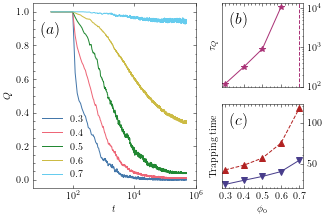

In [242]:
save = True
#save = False
do_inset = True
#do_inset = False
G = 'sigmoid'
#G = 'uniform'
t_re0=5e-1
t1=1e-2
t2 = 4.99e5
drop_thr = 0.6
phi = '0.4'
Q_d = 100
Q_d = 100
fig = figure(constrained_layout=True, figsize=(4.5,3))
ax_dict = fig.subplot_mosaic('''
                                AAB
                                AAC
                             ''', gridspec_kw={"wspace": 0., "hspace": 0.})
#Q_fname = 'gwdg/Qs/Qtd-2D-Na100-No500-Ro5-phi{phi}-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG{BG}-TMrandom.tsv'
#flist = [Q_fname.format(phi=phi, BG=BG) for BG in ['0.5', '0.1', '0.005', '0.001']]
flist = ['gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.3-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.5-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.6-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.7-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
        ]
re_pattern_BG = '(?<=BG).*(?=-TMrandom)'
re_pattern_tre = '(?<=t_re).*(?=-tgsd)'
re_pattern_phi = '(?<=phi).*(?=-T0)'
drop_data = [[]]
for f0 in flist:
    df0 = pd.read_csv(f0.format(G=G), delim_whitespace=True, index_col=0)
    phi = re.findall(re_pattern_phi, f0)[0]
    BG = re.findall(re_pattern_BG, f0)[0]
    t_re0 = float(re.findall(re_pattern_tre, f0)[0])
    t_re = t_re0/float(BG)
    if (f0 == flist[0]+'s'):
        label = r'$\phi_o=%s$'%'{:.1g}'.format(num2tex(float(phi)))
    else:
        label = r'$%s$'%'{:.1g}'.format(num2tex(float(phi)))
    ax_dict['A'].plot(df0.loc[t1:t2].index, df0.loc[t1:t2]['%d'%Q_d], label=label)#, color='C%d'%i)
    Q = df0['%s'%str(Q_d1)]
    t_drop = Q.sub(drop_thr).abs().idxmin()
    drop_data = drop_data + [[float(phi), t_drop]]   
drop_data = np.array(drop_data[1:])
drop_data[-1, 1] = np.inf 
for ax in [ax_dict['A']]:
    ax.set_xscale('log')
    ax.set_xlabel('$t$')
    ax.set_xlim(5e0, 1e6)
    
ax_dict['A'].set_ylabel('$Q$')
#ax_dict['B'].set_ylabel('$Q(t, d=200)$')
#ax_dict['A'].set_xlim(1e-2, 1e4)
#ax_dict['B'].set_yticklabels([])
if do_inset:
    #ax3 = fig.add_axes([0.17, 0.22, 0.25, 0.28])
    ax3 = ax_dict['B']
    #ax3.yaxis.set_ticks_position('right')
    #ax3.yaxis.set_label_position('right')

    #ax3.xaxis.set_ticks_position('top')
    #ax3.xaxis.set_label_position('top')

    ax3.plot(drop_data[:, 0], drop_data[:, 1], '-*', color='C5', label='$d={}$'.format(Q_d))
    ax3.set_xscale('linear')
    #ax3.set_ylim(1e3, 1e5)
    ax3.set_yscale('log')
    #ax3.set_xlabel('$\phi$')
    ax3.set_xticks([0.3, 0.4, 0.5, 0.6, 0.7])
    ax3.set_xticklabels([])
    ax3.set_ylabel('$\\tau_Q$')
    ax4 = ax_dict['C']
    ax4.plot(phi_arrf, ttrap_mean_s, '-v', color=C1, label='S')
    ax4.plot(phi_arrf, ttrap_mean_u, '--^', color=C2, label='U')
    #ax3.set_yscale('log')
    ax4.set_xlabel('$\phi_{\mathrm{o}}$')#, fontsize=inset_fs)
    ax4.set_xticks([0.3, 0.4, 0.5, 0.6, 0.7])
    ax4.set_ylabel('Trapping time')#, fontsize=inset_fs)
    ax3.set_xlim(ax4.get_xlim())
    ax3.yaxis.tick_right()
    ax4.yaxis.tick_right()
    ax3.axvline(x=0.7, ls='--', color='C5')

ax_dict['A'].legend(loc='best', frameon=False)
for k in ['A', 'B', 'C']:
    ax = ax_dict[k]
    ax_dict[k].text(  .1-0.05*(k=='A'), .9, '$(%s)$'%k.lower(), fontsize=16, ha='left', va='top', transform=ax_dict[k].transAxes)


#plt.tight_layout()
if save:
    fname1 = 'plots/4paper/Qtd{Q_d1}-v4-Na100-No2500-diff-phi-t_re5-G{G}'.format(Q_d1=Q_d1, Q_d2=Q_d2, G=G)
    fname1 = fname1.replace('.', '_')
    fname2 = fname1.replace('4paper/', '')
    print(fname1)
    fig.savefig(fname1+'.pdf', dpi=200, bbox_inches='tight')
    fig.savefig(fname2+'.svg', dpi=200, bbox_inches='tight')

In [76]:
ax3.get_xlim()

(0.27999999999999997, 0.72)

In [331]:
%qtconsole

## $\tau_Q$ vs $\tau_{re}$

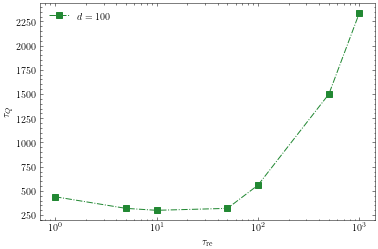

In [876]:
save = True
save = False
phi = '0.4'
Q_d1 = Q_d = 100
Q_d2 = 100
drop_thr = 0.6
Pe = '1e2'
fig = figure(figsize=(6,4))
#subplot(1,1,1)
t_lim = 9.9861e3
flist = ['gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.5-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.05-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.01-TMrandom.tsv',         
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.005-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.001-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.0005-TMrandom.tsv',
         
        ]
re_pattern_tre = '(?<=t_re).*(?=-tgsd)'
re_pattern_BG = '(?<=BG).*(?=-TM)'
drop_data = [[]]
for f0 in flist:
    df0 = pd.read_csv(f0, delim_whitespace=True, index_col=0)
    t_re0 = re.findall(re_pattern_tre, f0)[0]
    BG = re.findall(re_pattern_BG, f0)[0]
    t_re = float(t_re0)/float(BG)
    Q = df0['%s'%str(Q_d)]
    t_drop = Q.sub(drop_thr).abs().idxmin()
    drop_data = drop_data + [[float(t_re), t_drop]]   
    #plot(df0.loc[1e-2:t_lim].index, df0.loc[1e-2:t_lim]['%d'%Q_d], label=label)
#legend(loc='best')
drop_data_s = np.array(drop_data[1:])
plot(drop_data_s[:, 0], drop_data_s[:, 1], '-.s', color='C2', label='$d={}$'.format(Q_d))
xscale('log')
#yscale('log')
xlabel('$\\tau_{\mathrm{re}}$')
ylabel('$\\tau_Q$')
legend(loc='best')

if save:
    fname = 'plots/Qtd{Q_d}-t_drop-drop_thr{drop_thr}-Na100-No500-phi{phi}-Pe{Pe}-t_re{t_re}'.format(t_re=t_re, Pe=Pe, Q_d=Q_d, drop_thr=drop_thr, phi=phi)
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

In [335]:
%matplotlib inline

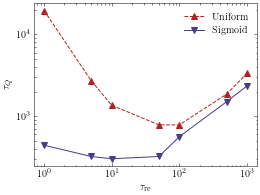

In [887]:
save = True
#save = False
phi = '0.4'
Q_d1 = Q_d = 100
Q_d2 = 100
drop_thr = 0.6
Pe = '1e2'
fig = figure(figsize=(4,3))
#subplot(1,1,1)
t_lim = 9.9861e3
flist = ['gwdg/Qs/Qtd-v5-2D-Na100-No5000-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.5-TMrandom.tsv',
         'gwdg/Qs/Qtd-v5-2D-Na100-No5000-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv',
         'gwdg/Qs/Qtd-v5-2D-Na100-No5000-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.05-TMrandom.tsv',
         'gwdg/Qs/Qtd-v5-2D-Na100-No5000-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.01-TMrandom.tsv',         
         'gwdg/Qs/Qtd-v5-2D-Na100-No5000-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.005-TMrandom.tsv',
         'gwdg/Qs/Qtd-v5-2D-Na100-No5000-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.001-TMrandom.tsv',
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.0005-TMrandom.tsv',        
        ]
re_pattern_tre = '(?<=t_re).*(?=-tgsd)'
re_pattern_BG = '(?<=BG).*(?=-TM)'
drop_data = [[]]
for f0 in flist:
    df0 = pd.read_csv(f0, delim_whitespace=True, index_col=0)
    t_re0 = re.findall(re_pattern_tre, f0)[0]
    BG = re.findall(re_pattern_BG, f0)[0]
    t_re = float(t_re0)/float(BG)
    Q = df0['%s'%str(Q_d)]
    t_drop = Q.sub(drop_thr).abs().idxmin()
    drop_data = drop_data + [[float(t_re), t_drop]]   
    #plot(df0.loc[1e-2:t_lim].index, df0.loc[1e-2:t_lim]['%d'%Q_d], label=label)
#legend(loc='best')
drop_data_u = np.array(drop_data[1:])
plot(drop_data_u[:, 0], drop_data_u[:, 1], '--^', color=C2, label='Uniform')
plot(drop_data_s[:, 0], drop_data_s[:, 1], '-v', color=C1, label='Sigmoid')

xscale('log')
yscale('log')
xlabel('$\\tau_{\mathrm{re}}$')
ylabel('$\\tau_Q$')
legend(loc='best')

if save:
    fname = 'plots/Qtd{Q_d}-v4-t_drop-drop_thr{drop_thr}-phi{phi}-diff-G'.format(t_re=t_re, Pe=Pe, Q_d=Q_d, drop_thr=drop_thr, phi=phi)
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

1.3333333333333333

## Q_inf vs d

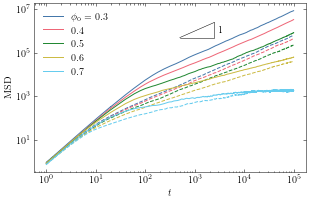

In [230]:
save = True
#save = False
do_inset = False
#f = figure(figsize=(2.5,2.5))
f = figure(figsize=(4.5,3))
G="sigmoid"
#G="uniform"
ending=1e5
f0 = 'gwdg/final-msds/msd-mean-v4-Na100-No2500-phi{phi}-tau_re5e-1-G{G}-BG0.1-TMrandom-allsims.tsv'
ff1 = '/omid/ehsan/active-rods-sims/msds/msd-mean-v3-2D-Na2000-No10000-Ro5-phi0.3-dim2-T0-t_re5e-1-tgsd1-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom-id1.tsv'
f00 = '/omid/ehsan/active-rods-sims/gsds/msd-init-phi{phi}-tre{t_re}-BG{BG}-G{G}-id100.tsv'
for j, phi in enumerate(['0.3', '0.4', '0.5', '0.6', '0.7']):
    i = j
    df0 = pd.read_csv(f0.format(phi=phi, G='sigmoid'), delim_whitespace=True, index_col=0)
    df1 = pd.read_csv(f0.format(phi=phi, G='uniform'), delim_whitespace=True, index_col=0)
    #df00 = pd.read_csv(f00.format(phi=phi, G='sigmoid', BG="0.1", t_re="5e-1"), delim_whitespace=True, index_col=0)
    #df11 = pd.read_csv(f00.format(phi=phi, G='uniform', BG="0.1", t_re="5e-1"), delim_whitespace=True, index_col=0)
    if not(f0 in [ff1]):
        if j==0:
            label='$\phi_\mathrm{{o}}={phi}$'.format(phi=phi)
        else:
            label='${phi}$'.format(phi=phi)
        plot(df0.loc[1:ending].index, df0.loc[1:ending].MSD, '-', label=label, color='C%d'%i)
        plot(df1.loc[1:ending].index, df1.loc[1:ending].MSD, '--', color='C%d'%i)
        #plot(df00.loc[1:3e1].index, df00.loc[1:3e1].MSD, color='C%d'%i)
        #plot(df11.loc[1:3e1].index, df11.loc[1:3e1].MSD, color='C%d'%i)
    else:
        plot(df0.loc[1:2e1].index, df0.loc[1:2e1].MSD, color='C0')
x = np.linspace(1e3, 5e3, 100) *5e-1
v = 1.0
y = 1e3*x**v
plot(x, y, '-', color='black', lw=0.5)
plot([x[0], x[-1], x[-1]], [y[0], y[0], y[-1]], color='k', lw=0.5)
text(x[-1]+5e2, 0.3*(y[0]+y[-1]), '$1$')

legend(loc='best')
xscale('log')
yscale('log')
xlabel('$t$')
ylabel('MSD')
#grid()

#plt.text(  # position text relative to Axes
#    .1, .92, '$(a)$', fontsize=16,
#    ha='left', va='top',
#    transform=gca().transAxes)

if do_inset:
    ax3 = f.add_axes([0.47, 0.22, 0.25, 0.28])
    ax3.yaxis.set_ticks_position('right')
    ax3.yaxis.set_label_position('right')

    ax3.xaxis.set_ticks_position('top')
    ax3.xaxis.set_label_position('top')

    ax3.plot(drop_data[:, 0], drop_data[:, 1], '-.+', color='C5', label='$d={}$'.format(Q_d))
    #ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.set_xlabel('$\phi$')
    ax3.set_xticks([0.3, 0.4, 0.5, 0.6, 0.7])
    ax3.set_ylabel('$\\tau_Q$')


tight_layout()
if save:
    #ffname = 'plots/4paper/msds-v4-varphi-tre5-diffG-TM{TM}'.format(TM='random', G=G)
    ffname = 'plots/4paper/fig5-v2'
    f.savefig(ffname+'.pdf', dpi=200, bbox_inches='tight')
    ffname = ffname.replace('4paper/', '')
    f.savefig(ffname+'.svg', dpi=200, bbox_inches='tight')    

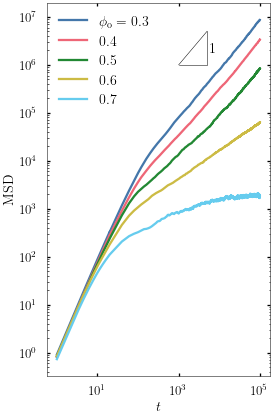

In [13]:
save = True
#save = False
f = figure(figsize=(4,6))
G="sigmoid"
Gkey='s'
#G="uniform"
legend_fs = 14
ending=1e5
f0 = 'gwdg/final-msds/msd-mean-v4-Na100-No2500-phi{phi}-tau_re5e-1-G{G}-BG0.1-TMrandom-allsims.tsv'
ff1 = '/omid/ehsan/active-rods-sims/msds/msd-mean-v3-2D-Na2000-No10000-Ro5-phi0.3-dim2-T0-t_re5e-1-tgsd1-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom-id1.tsv'
f00 = '/omid/ehsan/active-rods-sims/gsds/msd-init-phi{phi}-tre{t_re}-BG{BG}-G{G}-id100.tsv'
for j, phi in enumerate(['0.3', '0.4', '0.5', '0.6', '0.7']):
    i = j
    df0 = pd.read_csv(f0.format(phi=phi, G='sigmoid'), delim_whitespace=True, index_col=0)
    df1 = pd.read_csv(f0.format(phi=phi, G='uniform'), delim_whitespace=True, index_col=0)
    #df00 = pd.read_csv(f00.format(phi=phi, G='sigmoid', BG="0.1", t_re="5e-1"), delim_whitespace=True, index_col=0)
    #df11 = pd.read_csv(f00.format(phi=phi, G='uniform', BG="0.1", t_re="5e-1"), delim_whitespace=True, index_col=0)
    if i==0:
        label='$\phi_\mathrm{{o}}={phi}$'.format(phi=phi)
        plot(df0.loc[1:ending].index, df0.loc[1:ending].MSD, '-', label=label, color='C%d'%i)
        #plot(df1.loc[1:ending].index, df1.loc[1:ending].MSD, '--', color='C%d'%i)
        #plot(df00.loc[1:3e1].index, df00.loc[1:3e1].MSD, color='C%d'%i)
        #plot(df11.loc[1:3e1].index, df11.loc[1:3e1].MSD, color='C%d'%i)
    else:
        label='${phi}$'.format(phi=phi)
        plot(df0.loc[1:ending].index, df0.loc[1:ending].MSD, '-', label=label, color='C%d'%i)
        #plot(df0.loc[1:2e1].index, df0.loc[1:2e1].MSD, color='C0')
x = np.linspace(1e3, 5e3, 100)
v = 1.0
y = 1e3*x**v
plot(x, y, '-', color='black', lw=0.5)
plot([x[0], x[-1], x[-1]], [y[0], y[0], y[-1]], color='k', lw=0.5)
text(x[-1]+1e3, 0.3*(y[0]+y[-1]), '$1$', fontsize=legend_fs)

legend(loc='best', fontsize=legend_fs)
xscale('log')
yscale('log')
xlabel('$t$')
ylabel('MSD')
#grid()
#plt.text(  # position text relative to Axes
#    .1, .92, '$(a)$', fontsize=16,
#    ha='left', va='top',
#    transform=gca().transAxes)

tight_layout()
if save:
    #ffname = 'plots/4paper/msds-v4-varphi-tre5-diffG-TM{TM}'.format(TM='random', G=G)
    ffname = 'plots/4slides/msd-phi-tau_re5-G{Gkey}'.format(Gkey=Gkey)
    #f.savefig(ffname+'.pdf', dpi=200, bbox_inches='tight')
    #ffname = ffname.replace('4paper/', '')
    f.savefig(ffname+'.svg', dpi=400, bbox_inches='tight')    

In [45]:
%qtconsole

# MSD vs $\tau_{re}$, $\phi=0.4$

### For paper: Final-msds t_re

0.5
0.1
0.005
0.001


/tmp/ipykernel_279449/2973957593.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


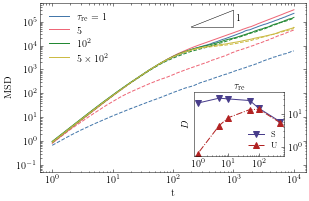

In [232]:
# MSD vs \tau_{re}, \phi=0.4
save = True
#save = False
do_inset = True
t_re0 = 5e-1
ending = 1e4
f = plt.figure(constrained_layout=False, figsize=(4.5,3.))
ax_dict = f.subplot_mosaic('B')
########################################################
########################################################
ax_id = 'B'
if ax_id=='B':
    phi = "0.4"
    TM = 'random'
    flist_s = glob.glob('gwdg/final-msds/msd*v4*No2500*phi{phi}*tau_re5e-1*sigmoid*TM{TM}*allsims.tsv'.format(phi=phi, TM=TM))
    flist_u = glob.glob('gwdg/final-msds/msd*v4*No2500*phi{phi}*tau_re5e-1*uniform*TM{TM}*allsims.tsv'.format(phi=phi, TM=TM))
    re_pattern = '(?<=BG).*(?=-TM)'
    flist_s.sort(key=lambda x: float(re.findall(re_pattern, x)[0]))
    flist_u.sort(key=lambda x: float(re.findall(re_pattern, x)[0]))
    df_s = {}
    df_u = {}
    for f0 in flist_s:
        BG = re.findall(re_pattern, f0)[0]
        df_s[BG] = pd.read_csv(f0, delim_whitespace=True, index_col=0)
    for f0 in flist_u:
        BG = re.findall(re_pattern, f0)[0]
        df_u[BG] = pd.read_csv(f0, delim_whitespace=True, index_col=0)
    ax2 = ax_dict['B']
    BG_list1 = ['0.001', '0.005', '0.1', '0.5'][::-1]
    i = 0
    for BG in BG_list1:
        if not(BG in df_s.keys()):
            continue
        print(BG)
        df0 = df_s[BG]
        if len(df0)==0:
            continue;
        t_re = t_re0*1./float(BG)
        
        label = '$\\tau_{{\mathrm{{re}}}}={tre:.1g}$'.format(BG=BG, tre=num2tex(t_re))
        ax2.plot(df0.loc[:ending].index, df0.loc[:ending].MSD, color='C%d'%i, label=label)
        i += 1
    i = 0
    for BG in BG_list1:
        if not(BG in df_u.keys()):
            continue
        df0 = df_u[BG]
        if len(df0)==0:
            continue;

        t_re = t_re0*1./float(BG)
        label = 'G: uniform,\n $\\tau_{{re}}={tre:.2g}$'.format(BG=BG, tre=num2tex(t_re))
        ax2.plot(df0.loc[1:ending].index, df0.loc[1:ending].MSD, color='C%d'%i, ls='--')
        i += 1
    x = np.linspace(1e3, 5e3, 100)*2e-1
    v = 1.0
    y = 3e2*x**v
    ax2.plot(x, y, '-', color='black', lw=0.5)
    ax2.plot([x[0], x[-1], x[-1]], [y[0], y[0], y[-1]], color='k', lw=0.5)
    ax2.text(x[-1]+1e2, 0.3*(y[0]+y[-1]), '$1$')
#############

########################################################
if do_inset:
    C1 = 'darkslateblue'
    C2 = 'firebrick'

    ax3 = f.add_axes([0.62, 0.24, 0.28, 0.3])
    ax3.plot(D_df.index, D_df.s_D, '-v', label='S', color=C1)
    u_id = D_df.u_D.isna()
    ax3.plot(D_df.index.values[~u_id], D_df.u_D.values[~u_id], '-.^', label='U', color=C2)
    ax3.set_xlabel('$\\tau_{\mathrm{re}}$')
    ax3.set_ylabel('$D$')
    ax3.xaxis.tick_bottom()
    ax3.yaxis.tick_right()
    ax3.xaxis.set_label_position('top')
########################################################
legend_list = ['$\\tau_{\mathrm{re}}=1$', '5', '$10^2$', '$5\\times10^2$']
for ax in f.axes:
    if do_inset:
        if not(ax==ax3):
            ax.legend(loc='best', frameon=False)
            ax.set_xlabel('t')
    else:
        ax.legend(loc='best', frameon=False)
        ax.set_xlabel('t')
    ax.legend(legend_list, loc='best', frameon=False)

    ax.set_xscale('log')
    ax.set_yscale('log')
    #xlim(1e-1, 5e3)
ax2.set_ylabel('MSD')
if do_inset:
    ax2.set_ylim(5e-2, )
    ax3.set_ylim(None, 5e1)
    ax3.legend(loc='best', fontsize=8)
    #ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax3.get_xaxis().get_major_formatter().labelOnlyBase = False

plt.tight_layout()
if save:
    #ffname = 'plots/4paper/msds-v4-vartre-phi0_4-Gsigmoid-TM{TM}'.format(phi=phi, TM=TM)
    ffname = 'plots/4paper/fig2-v3'.format(phi=phi, TM=TM)
    f.savefig(ffname+'.pdf', dpi=200, bbox_inches='tight')
    ffname = ffname.replace('4paper/', '')
    f.savefig(ffname+'.svg', dpi=200, bbox_inches='tight')    

## For slides: Final-msds t_re

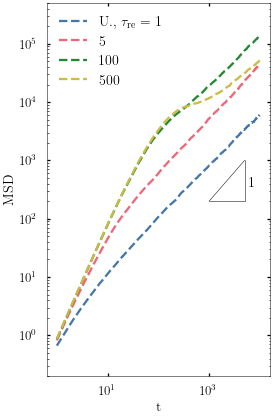

In [15]:
# MSD vs \tau_{re}, \phi=0.4
Gkey = 'u'
phi = '0.4'
TM = 'random'
legend_fs = 14
save = True
#save = False
do_inset = False
t_re0 = 5e-1
ending = 1e4
f = plt.figure(figsize=(4, 4*1.5))
ax_dict = {'B': plt.gca()}
########################################################
########################################################
ax_id = 'B'
if ax_id=='B':
    flist_s = glob.glob('gwdg/final-msds/msd*v4*No2500*phi{phi}*tau_re5e-1*sigmoid*TM{TM}*allsims.tsv'.format(phi=phi, TM=TM))
    flist_u = glob.glob('gwdg/final-msds/msd*v4*No2500*phi{phi}*tau_re5e-1*uniform*TM{TM}*allsims.tsv'.format(phi=phi, TM=TM))
    re_pattern = '(?<=BG).*(?=-TM)'
    flist_s.sort(key=lambda x: float(re.findall(re_pattern, x)[0]))
    flist_u.sort(key=lambda x: float(re.findall(re_pattern, x)[0]))
    df_s = {}
    df_u = {}
    for f0 in flist_s:
        BG = re.findall(re_pattern, f0)[0]
        df_s[BG] = pd.read_csv(f0, delim_whitespace=True, index_col=0)
    for f0 in flist_u:
        BG = re.findall(re_pattern, f0)[0]
        df_u[BG] = pd.read_csv(f0, delim_whitespace=True, index_col=0)
    ax2 = ax_dict['B']
    BG_list1 = ['0.001', '0.005', '0.1', '0.5'][::-1]
    i = 0
    if 'u' in Gkey:
        for BG in BG_list1:
            if not(BG in df_u.keys()):
                continue
            df0 = df_u[BG]
            if len(df0)==0:
                continue;

            t_re = t_re0*1./float(BG)
            if i==0:
                label = 'U., $\\tau_{{\mathrm{{re}}}}={tre:g}$'.format(BG=BG, tre=num2tex(t_re))
            else:
                label= '${tre:g}$'.format(BG=BG, tre=num2tex(t_re))
            ax2.plot(df0.loc[1:ending].index, df0.loc[1:ending].MSD, color='C%d'%i, ls='--', label=label)
            i += 1
    i = 0
    if 's' in Gkey:
        for BG in BG_list1:
            if not(BG in df_s.keys()):
                continue
            print(BG)
            df0 = df_s[BG]
            if len(df0)==0:
                continue;
            t_re = t_re0*1./float(BG)
            if i==0:
                label = 'S., $\\tau_{{\mathrm{{re}}}}={tre:g}$'.format(BG=BG, tre=num2tex(t_re))
            else:
                label = '${tre:g}$'.format(BG=BG, tre=num2tex(t_re))
            ax2.plot(df0.loc[:ending].index, df0.loc[:ending].MSD, color='C%d'%i, label=label)
            i += 1

    x = np.linspace(1e3, 5e3, 100)
    v = 1.0
    y = 2e-1*x**v
    ax2.plot(x, y, '-', color='black', lw=0.5)
    ax2.plot([x[0], x[-1], x[-1]], [y[0], y[0], y[-1]], color='k', lw=0.5)
    ax2.text(x[-1]+1e3, 0.3*(y[0]+y[-1]), '$1$', fontsize=legend_fs)
#############
########################################################
for ax in f.axes:
    if do_inset:
        if not(ax==ax3):
            ax.legend(loc='best', frameon=False)
            ax.set_xlabel('t')
    else:
        ax.legend(loc='upper left', frameon=False, ncol=1, fontsize=legend_fs)
        ax.set_xlabel('t')

    ax.set_xscale('log')
    ax.set_yscale('log')
ax2.set_ylim(2e-1, 5e5)
ax2.set_ylabel('MSD')

plt.tight_layout()
if save:
    #ffname = 'plots/4paper/msds-v4-vartre-phi0_4-Gsigmoid-TM{TM}'.format(phi=phi, TM=TM)
    ffname = 'plots/4slides/msd-tau_re-phi{phi}-G{Gkey}'.format(phi=phi, Gkey=Gkey)
    #f.savefig(ffname+'.pdf', dpi=200, bbox_inches='tight')
    #ffname = ffname.replace('4paper/', '')
    f.savefig(ffname+'.svg', dpi=400, bbox_inches='tight')    

In [10]:
4.5*1.5

6.75

In [16]:
phi = "0.4"
TM = 'random'
#flist_s = glob.glob('gwdg/msds/msd*v4*phi{phi}*t_re5e-1*tgsd2e1*sigmoid*TM{TM}*allsims.tsv'.format(phi=phi, TM=TM))
#flist_s2 = glob.glob('gwdg/msds/msd*v4*phi{phi}*t_re5e-1*tgsd2e1*sigmoid*TM{TM}*allsims.tsv'.format(phi=phi, TM=TM))

#flist_u = glob.glob('gwdg/msds/msd*v4*phi{phi}*t_re5e-1*tgsd2e1*uniform*TM{TM}*allsims.tsv'.format(phi=phi, TM=TM))
flist_s = glob.glob('gwdg/final-msds/msd*v4*No2500*phi{phi}*tau_re5e-1*sigmoid*TM{TM}*allsims.tsv'.format(phi=phi, TM=TM))
flist_u = glob.glob('gwdg/final-msds/msd*v4*No2500*phi{phi}*tau_re5e-1*uniform*TM{TM}*allsims.tsv'.format(phi=phi, TM=TM))

re_pattern = '(?<=BG).*(?=-TM)'
flist_s.sort(key=lambda x: float(re.findall(re_pattern, x)[0]))
flist_u.sort(key=lambda x: float(re.findall(re_pattern, x)[0]))
df_s = {}
df_u = {}
for f0 in flist_s:
    BG = re.findall(re_pattern, f0)[0]
    df_s[BG] = pd.read_csv(f0, delim_whitespace=True, index_col=0).iloc[1:]
for f0 in flist_u:
    BG = re.findall(re_pattern, f0)[0]
    df_u[BG] = pd.read_csv(f0, delim_whitespace=True, index_col=0).iloc[1:]


In [26]:
list(df_s.keys())

['0.001', '0.005', '0.01', '0.05', '0.1', '0.5']

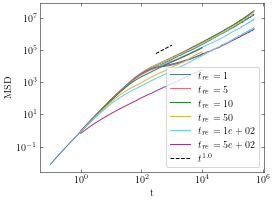

In [145]:
#save = True
save = False
t_re0 = 0.5
t_re02 = 0.5
t2 = 5e5
#f = figure()
f = figure(figsize=(4.,3))

BG_list2 = ['0.002','0.01', '0.02', '0.1', '0.2', '0.5', '1.0'][::-1]
BG_list1 = ['0.001','0.005', '0.1', '0.5'][::-1]
i = 0
for BG in list(df_s.keys())[::-1]:
    df0 = df_s[BG]
    t_re = t_re0*1./float(BG)
    label = '$t_{{re}}={tre:.2g}$'.format(BG=BG, tre=t_re)
    plot(df0.loc[:].index, df0.loc[:].MSD, color='C%d'%i, label=label)
    i += 1
i = 0
for BG in df_u.keys():
    df0 = df_u[BG]
    t_re = t_re0*1./float(BG)
    label = 'G: uniform,\n $t_{{re}}={tre:.2g}$'.format(BG=BG, tre=t_re)
    plot(df0.loc[:].index, df0.loc[:].MSD, color='C%d'%i, ls='-')
    i += 1
x = np.linspace(3e2, 1e3, 100)
v = 1.0
plot(x, 2e2*x**v, '--', color='black', label='$t^{{{v}}}$'.format(v=v))
legend(loc='best', frameon=True)
xscale('log')
yscale('log')
xlabel('t')
ylabel('MSD')
#title('$N_a = 100$, $N_o = 500$, $\phi = {phi}$\n20 sims., tumblling mode: random'.format(phi=phi))
#grid()
plt.tight_layout()
if save:
    ffname = 'plots/4paper/msds-phi{phi}-Gsigmoid-vs-tumbling-TM{TM}'.format(phi=phi, TM=TM)
    ffname = ffname.replace('.', '_')
    f.savefig(ffname+'.pdf', dpi=200, bbox_inches='tight')
    ffname = ffname.replace('4paper/', '')
    f.savefig(ffname+'.svg', dpi=200, bbox_inches='tight')    

In [233]:
from scipy.optimize import curve_fit

500.0 0.001 0.5
100.0 0.005 0.5
50.0 0.01 0.5
10.0 0.05 0.5
5.0 0.1 0.5
1.0 0.5 0.5


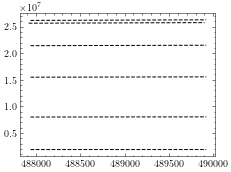

In [239]:
save = False
#save = True

#do_inset = True

def func(x, D):
    return D*x
#f = figure(figsize=(6,4))
BG_list = ['0.002','0.01', '0.02', '0.1', '0.2', '0.5', '1.0'][::-1]
BG_list2 = ['0.002','0.01', '0.02', '0.1', '0.2', '0.5', '1.0'][::-1]
BG_list1 = ['0.001', '0.005','0.01', '0.05', '0.1', '0.5'][::-1]
t_re02 = 5e-1
t_re0 = 5e-1

i = 0
D_df = pd.DataFrame()
t_re_list = []
D_list = []
#for BG in BG_list1:
for BG in df_s.keys():
    if not(BG in df_s.keys()):
        continue
    df0 = df_s[BG]
    t_re = t_re02*1./float(BG)
    print(t_re, BG, t_re02)
    t_re_list.append(t_re)
    #if BG in']
    
    #xdata = df0.loc[5e3:1e4].index.values
    #ydata = df0.loc[5e3:1e4].MSD.values
    xdata = df0.iloc[-600:-500].index.values
    ydata = df0.iloc[-600:-500].MSD.values
    
    xdata = xdata[~np.isnan(ydata)]
    ydata = ydata[~np.isnan(ydata)]
    popt, pcov = curve_fit(func, xdata, ydata)
    plot(xdata, func(xdata, *popt), '--k')
    D_list.append(*popt)
    i += 1
D_df['s_D'] = D_list
D_df['t_re'] = t_re_list
D_df.set_index('t_re', inplace=True)
i = 0
t_re_list = []
D_list = []
#for BG in BG_list2:
for BG in df_u.keys():
    if not(BG in df_u.keys()):
        continue
    df0 = df_u[BG]
    t_re = t_re0*1./float(BG)
    t_re_list.append(t_re)
    xdata = df0.loc[5e3:1e4].index.values
    ydata = df0.loc[5e3:1e4].MSD.values
    xdata = xdata[~np.isnan(ydata)]
    ydata = ydata[~np.isnan(ydata)]
    popt, pcov = curve_fit(func, xdata, ydata)
    D_list.append(*popt)
    i += 1
D_df.loc[np.array(t_re_list), 'u_D'] = D_list


/tmp/ipykernel_279449/4135887075.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


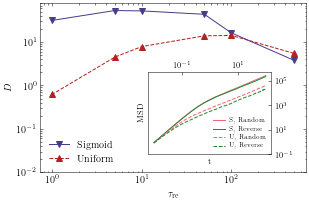

In [240]:
save = False
#save = True
lw = 1
do_inset = True
inset_fs = 8
C1 = 'darkslateblue'
C2 = 'firebrick'
f = figure(figsize=(4.5,3))
#plot(t_re_list, D_list, '-x', label='G: Sigmoid', color='green')
#plot(t_re_list, D_list, '--+', label='G: Uniform', color='purple')
plot(D_df.index, D_df.s_D, '-v', label='Sigmoid', color=C1, lw=lw)
u_id = D_df.u_D.isna()
plot(D_df.index.values[~u_id], D_df.u_D.values[~u_id], '--^', label='Uniform', color=C2, lw=lw)
xlabel('$\\tau_{\mathrm{re}}$')
ylabel('$D$')
#legend(loc='upper right', frameon=False)
legend(loc='best', frameon=False)

xscale('log')
yscale('log')
ylabel('$D$')
if do_inset:
    plt.ylim(1e-2, 8e1)
    fn11 = 'gwdg/small/msds/msd-mean-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom-allsims.tsv'
    fn12 = 'gwdg/small/msds/msd-mean-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.1-TMreverse-allsims.tsv'
    fn21 = 'gwdg/small/msds/msd-mean-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom-allsims.tsv'
    fn22 = 'gwdg/small/msds/msd-mean-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMreverse-allsims.tsv'
    df11 = pd.read_csv(fn11, delim_whitespace=True, index_col=0)
    df12 = pd.read_csv(fn12, delim_whitespace=True, index_col=0)
    df21 = pd.read_csv(fn21, delim_whitespace=True, index_col=0)
    df22 = pd.read_csv(fn22, delim_whitespace=True, index_col=0)

    ax3 = f.add_axes([0.48, 0.25, 0.38, 0.38])
    ax3.plot(df11.loc[1e-2:1e2].index, df11.loc[1e-2:1e2].MSD, label='S, Random', color='C1')
    ax3.plot(df12.loc[1e-2:1e2].index, df12.loc[1e-2:1e2].MSD, label='S, Reverse', color='C2')
    ax3.plot(df21.loc[1e-2:1e2].index, df21.loc[1e-2:1e2].MSD, label='U, Random', color='C1', ls='--')
    ax3.plot(df22.loc[1e-2:1e2].index, df22.loc[1e-2:1e2].MSD, label='U, Reverse', color='C2', ls='--')

    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.set_xlabel('t', fontsize=inset_fs)
    ax3.set_ylabel('MSD', fontsize=inset_fs)
    ax3.tick_params(axis='x', labelsize=inset_fs)
    ax3.tick_params(axis='y', labelsize=inset_fs)
    #ax3.xaxis.set_label_position('top')
    ax3.xaxis.set_ticks_position('top')
    ax3.yaxis.set_ticks_position('right')

    ax3.legend(loc='best', fontsize=inset_fs-2)
    ax3.set_ylim(1e-1, None)
#title('$N_a = 100$, $N_o = 500$, $\phi = {phi}$\n20 sims., tumblling mode: random'.format(phi=phi))
#grid()
plt.tight_layout()
do_inset = False
if save:
    #ffname = 'plots/4paper/D-phi{phi}-Gsigmoid-vs-tumbling-TM{TM}'.format(phi=phi, TM=TM)
    if do_inset:
        ffname = ffname + '-insetTMreverse'
    ffname = 'fig4-v2'
    ffname = ffname.replace('.', '_')
    f.savefig('plots/4paper/'+ffname+'.pdf', dpi=200, bbox_inches='tight')
    ffname2 = ffname.replace('4paper/', '')
    f.savefig(ffname+'.svg', dpi=200, bbox_inches='tight')   


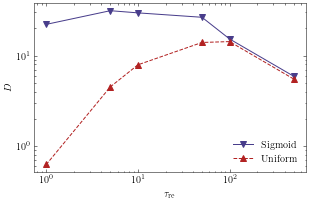

In [149]:
save = False
save = True
lw = 1
do_inset = False
inset_fs = 8
C1 = 'darkslateblue'
C2 = 'firebrick'
f = figure(figsize=(4.5,3))
#plot(t_re_list, D_list, '-x', label='G: Sigmoid', color='green')
#plot(t_re_list, D_list, '--+', label='G: Uniform', color='purple')
plot(D_df.index, D_df.s_D, '-v', label='Sigmoid', color=C1, lw=lw)
u_id = D_df.u_D.isna()
plot(D_df.index.values[~u_id], D_df.u_D.values[~u_id], '--^', label='Uniform', color=C2, lw=lw)
xlabel('$\\tau_{\mathrm{re}}$')
ylabel('$D$')
#legend(loc='upper right', frameon=False)
legend(loc='best', frameon=False)

xscale('log')
yscale('log')
ylabel('$D$')
if do_inset:
    plt.ylim(1e-2, 8e1)
    fn11 = 'gwdg/small/msds/msd-mean-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom-allsims.tsv'
    fn12 = 'gwdg/small/msds/msd-mean-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.1-TMreverse-allsims.tsv'
    fn21 = 'gwdg/small/msds/msd-mean-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom-allsims.tsv'
    fn22 = 'gwdg/small/msds/msd-mean-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMreverse-allsims.tsv'
    df11 = pd.read_csv(fn11, delim_whitespace=True, index_col=0)
    df12 = pd.read_csv(fn12, delim_whitespace=True, index_col=0)
    df21 = pd.read_csv(fn21, delim_whitespace=True, index_col=0)
    df22 = pd.read_csv(fn22, delim_whitespace=True, index_col=0)

    ax3 = f.add_axes([0.48, 0.25, 0.38, 0.38])
    ax3.plot(df11.loc[1e-2:1e2].index, df11.loc[1e-2:1e2].MSD, label='S, Random', color='C1')
    ax3.plot(df12.loc[1e-2:1e2].index, df12.loc[1e-2:1e2].MSD, label='S, Reverse', color='C2')
    ax3.plot(df21.loc[1e-2:1e2].index, df21.loc[1e-2:1e2].MSD, label='U, Random', color='C1', ls='--')
    ax3.plot(df22.loc[1e-2:1e2].index, df22.loc[1e-2:1e2].MSD, label='U, Reverse', color='C2', ls='--')

    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.set_xlabel('t', fontsize=inset_fs)
    ax3.set_ylabel('MSD', fontsize=inset_fs)
    ax3.tick_params(axis='x', labelsize=inset_fs)
    ax3.tick_params(axis='y', labelsize=inset_fs)
    #ax3.xaxis.set_label_position('top')
    ax3.xaxis.set_ticks_position('top')
    ax3.yaxis.set_ticks_position('right')

    ax3.legend(loc='best', fontsize=inset_fs-2)
    ax3.set_ylim(1e-1, None)
#title('$N_a = 100$, $N_o = 500$, $\phi = {phi}$\n20 sims., tumblling mode: random'.format(phi=phi))
#grid()
plt.tight_layout()
do_inset = False
if save:
    #ffname = 'plots/4paper/D-phi{phi}-Gsigmoid-vs-tumbling-TM{TM}'.format(phi=phi, TM=TM)
    if do_inset:
        ffname = ffname + '-insetTMreverse'
    ffname = 'D-tau_re-phi0.4-inset'
    ffname = ffname.replace('.', '_')
    f.savefig('plots/4slides/'+ffname+'.svg', dpi=400, bbox_inches='tight')


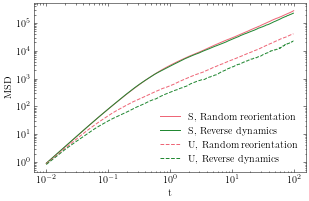

In [247]:
save = False
save = True
lw = 1
C1 = 'darkslateblue'
C2 = 'firebrick'
#f = figure(figsize=(4,4*1.5))
f = figure(figsize=(4.5,3))
xscale('log')
yscale('log')
ylabel('$D$')
#plt.ylim(1e-2, 8e1)
fn11 = 'gwdg/small/msds/msd-mean-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom-allsims.tsv'
fn12 = 'gwdg/small/msds/msd-mean-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.1-TMreverse-allsims.tsv'
fn21 = 'gwdg/small/msds/msd-mean-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom-allsims.tsv'
fn22 = 'gwdg/small/msds/msd-mean-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMreverse-allsims.tsv'
df11 = pd.read_csv(fn11, delim_whitespace=True, index_col=0)
df12 = pd.read_csv(fn12, delim_whitespace=True, index_col=0)
df21 = pd.read_csv(fn21, delim_whitespace=True, index_col=0)
df22 = pd.read_csv(fn22, delim_whitespace=True, index_col=0)

ax3 = plt.gca()
ax3.plot(df11.loc[1e-2:1e2].index, df11.loc[1e-2:1e2].MSD, label='S, Random reorientation', color='C1')
ax3.plot(df12.loc[1e-2:1e2].index, df12.loc[1e-2:1e2].MSD, label='S, Reverse dynamics', color='C2')
ax3.plot(df21.loc[1e-2:1e2].index, df21.loc[1e-2:1e2].MSD, label='U, Random reorientation', color='C1', ls='--')
ax3.plot(df22.loc[1e-2:1e2].index, df22.loc[1e-2:1e2].MSD, label='U, Reverse dynamics', color='C2', ls='--')

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel('t')
ax3.set_ylabel('MSD')

ax3.legend(loc='best')
#ax3.set_ylim(1e-1, None)
#title('$N_a = 100$, $N_o = 500$, $\phi = {phi}$\n20 sims., tumblling mode: random'.format(phi=phi))
#grid()
plt.tight_layout()
if save:
    #ffname = 'plots/4paper/D-phi{phi}-Gsigmoid-vs-tumbling-TM{TM}'.format(phi=phi, TM=TM)
    ffname = 'msd-phi0.4-TMreverse'
    f.savefig('plots/4slides/'+ffname+'.svg', dpi=400, bbox_inches='tight')
    f.savefig('plots/4paper/'+ffname+'.pdf', dpi=400, bbox_inches='tight')



In [839]:
%matplotlib inline
#%matplotlib

In [532]:
df_u.keys()

dict_keys(['0.001', '0.005', '0.01', '0.05', '0.1', '0.5'])

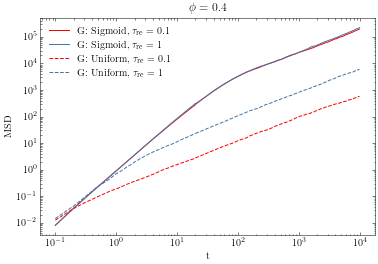

In [100]:
f = figure()
df00 = pd.read_csv('gwdg/msds/msd-mean-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-2-tgsd2e1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.5-TMrandom-allsims.tsv', delim_whitespace=True, index_col=0)
df0 = pd.read_csv('gwdg/msds/msd-mean-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.5-TMrandom-allsims.tsv', delim_whitespace=True, index_col=0)
df10 = pd.read_csv('gwdg/msds/msd-mean-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-2-tgsd2e1-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.5-TMrandom-allsims.tsv', delim_whitespace=True, index_col=0)
df1 = pd.read_csv('gwdg/msds/msd-mean-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.5-TMrandom-allsims.tsv', delim_whitespace=True, index_col=0)
###
f22 = '/omid/ehsan/active-rods-sims/gsds/msd-init-phi0.4-tre5e-1-BG0.5-Gsigmoid-id100.tsv'
f222 = '/omid/ehsan/active-rods-sims/gsds/msd-init-phi0.4-tre5e-2-BG0.5-Gsigmoid-id200.tsv'
f33 = '/omid/ehsan/active-rods-sims/gsds/msd-init-phi0.4-tre5e-1-BG0.5-Guniform-id200.tsv'
f333 = '/omid/ehsan/active-rods-sims/gsds/msd-init-phi0.4-tre5e-2-BG0.5-Guniform-id200.tsv'


df22 = pd.read_csv(f22, delim_whitespace=True, index_col=0)
df222 = pd.read_csv(f222, delim_whitespace=True, index_col=0)
plot(df222.loc[1e-2:2e1].index, df222.loc[1e-2:2e1].MSD, color='red', ls='-')
plot(df22.loc[1e-2:2e1].index, df22.loc[1e-2:2e1].MSD, color='C0', ls='-')

df33 = pd.read_csv(f33, delim_whitespace=True, index_col=0)
plot(df33.loc[1e-2:2e1].index, df33.loc[1e-2:2e1].MSD, color='C0', ls='--')
df333 = pd.read_csv(f333, delim_whitespace=True, index_col=0)
plot(df333.loc[1e-2:2e1].index, df333.loc[1e-2:2e1].MSD, color='red', ls='--')


plot(df00.loc[1e-2:1e4]['MSD'], label='G: Sigmoid, $\\tau_{\mathrm{re}} = 0.1$', color='red', ls='-')
plot(df0.loc[1e-2:1e4]['MSD'], label='G: Sigmoid, $\\tau_{\mathrm{re}} = 1$', color='C0')
plot(df10.loc[1e-2:1e4]['MSD'], label='G: Uniform, $\\tau_{\mathrm{re}} = 0.1$', color='red', ls='--')
plot(df1.loc[1e-2:1e4]['MSD'], label='G: Uniform, $\\tau_{\mathrm{re}} = 1$', color='C0', ls='--')

legend(loc='best')
title('$\phi=0.4$')
#plot(m)
xscale('log')
yscale('log')
xlabel('t')
ylabel('MSD')
fn = 'plots/MSD-phi0.4-tre1-vs-tre0.1-diffG'
f.savefig(fn+'.pdf', dpi=200, bbox_inches='tight')
f.savefig(fn+'.svg', dpi=200, bbox_inches='tight')

In [210]:
%matplotlib inline

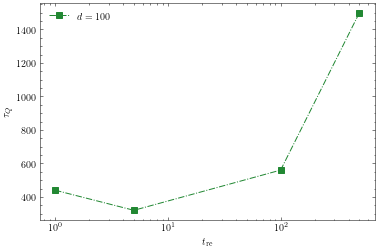

In [852]:
save = True
save = False
G = 'sigmoid'
phi = '0.4'
Q_d1 = Q_d = 100
Q_d2 = 100
drop_thr = 0.6
t_re0 = 5e-1
fig = figure(figsize=(6,4))
#subplot(1,1,1)
t_lim = 9.9861e3
flist = ['gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-G%s-alpha1e2-phimax0.91-phi00.63-BG0.5-TMrandom.tsv'%G,
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-G%s-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.tsv'%G,
         #'gwdg/Qs/Qtd-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd2e-1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.05-TMrandom.tsv',
         #'gwdg/Qs/Qtd-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd2e-1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.01-TMrandom.tsv',         
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-G%s-alpha1e2-phimax0.91-phi00.63-BG0.005-TMrandom.tsv'%G,
         'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-G%s-alpha1e2-phimax0.91-phi00.63-BG0.001-TMrandom.tsv'%G,
        ]
re_pattern_tre = '(?<=t_re).*(?=-tgsd)'
re_pattern_BG = '(?<=BG).*(?=-TM)'
drop_data = [[]]
for f0 in flist:
    df0 = pd.read_csv(f0, delim_whitespace=True, index_col=0)
    t_re0 = re.findall(re_pattern_tre, f0)[0]
    BG = re.findall(re_pattern_BG, f0)[0]
    t_re = float(t_re0)/float(BG)
    Q = df0['%s'%str(Q_d)]
    t_drop = Q.sub(drop_thr).abs().idxmin()
    drop_data = drop_data + [[float(t_re), t_drop]]   
    #plot(df0.loc[1e-2:t_lim].index, df0.loc[1e-2:t_lim]['%d'%Q_d], label=label)
#legend(loc='best')
drop_data = np.array(drop_data[1:])
plot(drop_data[:, 0], drop_data[:, 1], '-.s', color='C2', label='$d={}$'.format(Q_d))
xscale('log')
#yscale('log')
xlabel('$t_{\mathrm{re}}$')
ylabel('$\\tau_Q$')
legend(loc='best')

if save:
    fname = 'plots/Qtd{Q_d}-v3-t_drop-drop_thr{drop_thr}-Na100-No500-phi{phi}-t_re{t_re}'.format(t_re=t_re, Q_d=Q_d, drop_thr=drop_thr, phi=phi)
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

In [214]:
drop_data

array([[1.00e+00, 4.40e+02],
       [5.00e+00, 3.20e+02],
       [1.00e+02, 6.00e+02],
       [5.00e+02, 1.94e+03]])

/tmp/ipykernel_1253866/2044441623.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


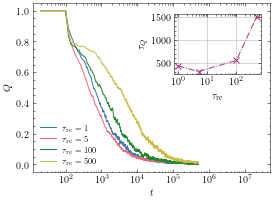

In [854]:
save = True
save = False
do_inset = True
#do_inset = False
t_re0=5e-1
phi = '0.4'
G = 'sigmoid'
#G = 'uniform'
Q_d1 = 100
Q_d2 = 100
fig = figure(constrained_layout=False, figsize=(4,3))
ax_dict = fig.subplot_mosaic('A')
Q_fname = 'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi{phi}-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG{BG}-TMrandom.tsv'
flist = [Q_fname.format(phi=phi, BG=BG, G=G) for BG in ['0.5', '0.1', '0.005', '0.001']]
re_pattern = '(?<=BG).*(?=-TMrandom)'
for i, f0 in enumerate(flist):
    #f0 = f0.replace('tgsd1e-2', 'tgsd2e-1')
    df0 = pd.read_csv(f0, delim_whitespace=True, index_col=0)
    BG = re.findall(re_pattern, f0)[0]
    t_re = t_re0/float(BG)
    label = r'$\tau_{\mathrm{re}}=%s$'%'{:g}'.format(num2tex(float(t_re)))
    ax_dict['A'].plot(df0.loc[2e-1:].index, df0.loc[2e-1:]['%d'%Q_d1], label=label)#, color='C%d'%i)
    #ax_dict['B'].plot(df0.index, df0['%d'%Q_d2], label=label)#, color='C%d'%i)
    #ax_dict['A'].axvline(drop_data[i,1], color='C%d'%i)
for ax in ax_dict.values():
    ax.set_xscale('log')
    ax.set_xlabel('$t$')
    ax.set_xlim(None, 5e7)
    
ax_dict['A'].set_ylabel('$Q$')
#ax_dict['B'].set_ylabel('$Q(t, d=200)$')
#ax_dict['A'].set_xlim(1e-2, 1e4)
#ax_dict['B'].set_yticklabels([])
if do_inset:
    ax3 = fig.add_axes([0.63, 0.62, 0.3, 0.28])
    #ax3 = fig.add_axes([0.2, 0.2, 0.3, 0.28])
    #ax3.yaxis.set_ticks_position('right')
    #ax3.yaxis.set_label_position('right')

    #ax3.xaxis.set_ticks_position('top')
    #ax3.xaxis.set_label_position('top')

    ax3.plot(drop_data[:, 0], drop_data[:, 1], '-.x', color='C5', label='$d={}$'.format(Q_d))
    ax3.set_xscale('log')
    #ax3.set_yscale('log')
    ax3.set_xlabel('$\\tau_{\mathrm{re}}$')
    ax3.set_ylabel('$\\tau_Q$')
ax_dict['A'].legend(loc='lower left', frameon=False, fontsize=8)
#ax_dict['A'].legend(loc='upper right', frameon=False, fontsize=8)
grid()
plt.tight_layout()
if save:
    fname1 = 'plots/4paper/Qtd{Q_d1}-v4-Na100-No500-phi{phi}-G{G}-diff-t_re'.format(phi=phi, Q_d1=Q_d1, Q_d2=Q_d2, G=G)
    fname1 = fname1.replace('.', '_')
    fname2 = fname1.replace('4paper/', '')
    print(fname1)
    fig.savefig(fname1+'.pdf', dpi=200, bbox_inches='tight')
    fig.savefig(fname2+'.svg', dpi=200, bbox_inches='tight')

/tmp/ipykernel_1253866/2901638946.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


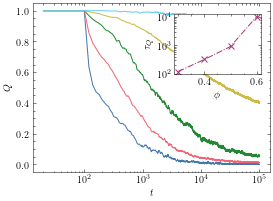

In [855]:
save = True
save = False
do_inset = True
#do_inset = False
t_re0=5e-1
phi = '0.4'
G = 'sigmoid'
Q_d1 = 100
Q_d2 = 100
ending = 1e5
fig = figure(constrained_layout=False, figsize=(4,3))
ax_dict = fig.subplot_mosaic('A')
Q_fname = 'gwdg/Qs/Qtd-v4-2D-Na100-No2500-Ro5-phi{phi}-T0-dt1e-2-t_re5e-1-tgsd2e1-G{G}-alpha1e2-phimax0.91-phi00.63-BG{BG}-TMrandom.tsv'
BG = 0.1
flist = [Q_fname.format(phi=phi, BG=BG, G=G) for phi in ['0.3', '0.4', '0.5', '0.6', '0.7']]
re_pattern = '(?<=phi).*(?=-T0)'
drop_data = [[]]
for f0 in flist:
    #f0 = f0.replace('tgsd1e-2', 'tgsd2e-1')
    df0 = pd.read_csv(f0, delim_whitespace=True, index_col=0)
    phi = re.findall(re_pattern, f0)[0]
    t_re = t_re0/float(BG)
    label = r'$\phi=%s$'%phi
    Q = df0.loc[2e-1:ending]['%d'%Q_d1]
    ax_dict['A'].plot(Q.index, Q, label=label)#, color='C%d'%i)
    #ax_dict['B'].plot(df0.index, df0['%d'%Q_d2], label=label)#, color='C%d'%i)
    t_drop = Q.sub(drop_thr).abs().idxmin()
    drop_data = drop_data + [[float(phi), t_drop]]   
drop_data = np.array(drop_data[1:])
drop_data[-1, 1] = np.inf 

for ax in ax_dict.values():
    ax.set_xscale('log')
    ax.set_xlabel('$t$')
    #ax.set_xlim(1e-2, 1e4)
    
ax_dict['A'].set_ylabel('$Q$')
#ax_dict['B'].set_ylabel('$Q(t, d=200)$')
#ax_dict['A'].set_xlim(1e-2, 1e4)
#ax_dict['B'].set_yticklabels([])
if do_inset:
    ax3 = fig.add_axes([0.63, 0.62, 0.3, 0.28])
    #ax3.yaxis.set_ticks_position('right')
    #ax3.yaxis.set_label_position('right')

    #ax3.xaxis.set_ticks_position('top')
    #ax3.xaxis.set_label_position('top')

    ax3.plot(drop_data[:, 0], drop_data[:, 1], '-.x', color='C5', label='$d={}$'.format(Q_d))
    #ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.set_xlabel('$\phi$')
    ax3.set_ylabel('$\\tau_Q$')
#ax_dict['A'].legend(loc='lower left', frameon=False, fontsize=8)
#grid()
plt.tight_layout()
if save:
    fname1 = 'plots/4paper/Qtd{Q_d1}-v3-Na100-No500-varphi-G{G}-t_re5'.format(Q_d1=Q_d1, Q_d2=Q_d2, G=G)
    fname1 = fname1.replace('.', '_')
    fname2 = fname1.replace('4paper/', '')
    print(fname1)
    fig.savefig(fname1+'.pdf', dpi=200, bbox_inches='tight')
    fig.savefig(fname2+'.svg', dpi=200, bbox_inches='tight')

In [78]:
0.18*20000

3600.0

In [106]:
L = 1981.66
Nw = 3600
t_re = 5
Ro = 0.5
t_coll2 = (L*L)/(2*Ro*Nw*Nw*t_re)
t_coll2

0.06060148696913581

In [110]:
(L/60)

33.02766666666667

In [366]:
nof_list = glob.glob('/omid/ehsan/active-rods-sims/gsds/*nofre*tsv')
f_list = glob.glob('/omid/ehsan/active-rods-sims/gsds/*-fre*tsv')

In [367]:
df_fr = pd.DataFrame()

for i,f0 in enumerate(f_list):
    df0 = pd.read_csv(f0, delim_whitespace=True, index_col=0)
    if len(df_fr) == 0:
        df_fr['index'] = df0.index
        df_fr.set_index('index', inplace=True)
    df_fr[i] = df0['MSD']
    

    
df_fr['MSD'] = np.nanmean(df_fr.values, axis=1)
plot(df_fr.index, df_fr.MSD, color='black', lw=2)
#plot(df_fr.index, df_fr.iloc[:,1:])
xscale('log')
yscale('log')
grid()

In [129]:
ur

array([5000., 4050., 3200., 2450., 1800., 1250.,  800.,  450.,  200.,
         50.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.])

In [280]:
%matplotlib 

Using matplotlib backend: Qt5Agg


In [319]:
(10*2500/(700.6)**2)**-1

19.633614400000003